In [29]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import cv2 as cv
import argparse
from torchvision import models, transforms

In [31]:
# pretrained model load 
weight_path = '../checkpoint_0302/texture_style1_best.pth' 

model = models.resnet50(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
model.load_state_dict(torch.load(weight_path))

<All keys matched successfully>

In [32]:
# get model layer outputs
model_weights = [] 
conv_layers = [] 

model_children = list(model.children())

In [33]:
counter = 0 

# append all the conv layers and their respective weights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter += 1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter += 1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
print(f"Total convolutional layers: {counter}")

Total convolutional layers: 49


In [34]:
for weight, conv in zip(model_weights, conv_layers):
    print(f"CONV: {conv} ====> SHAPE: {weight.shape}")

CONV: Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False) ====> SHAPE: torch.Size([64, 3, 7, 7])
CONV: Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False) ====> SHAPE: torch.Size([64, 64, 1, 1])
CONV: Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False) ====> SHAPE: torch.Size([64, 64, 3, 3])
CONV: Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False) ====> SHAPE: torch.Size([256, 64, 1, 1])
CONV: Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False) ====> SHAPE: torch.Size([64, 256, 1, 1])
CONV: Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False) ====> SHAPE: torch.Size([64, 64, 3, 3])
CONV: Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False) ====> SHAPE: torch.Size([256, 64, 1, 1])
CONV: Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False) ====> SHAPE: torch.Size([64, 256, 1, 1])
CONV: Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False

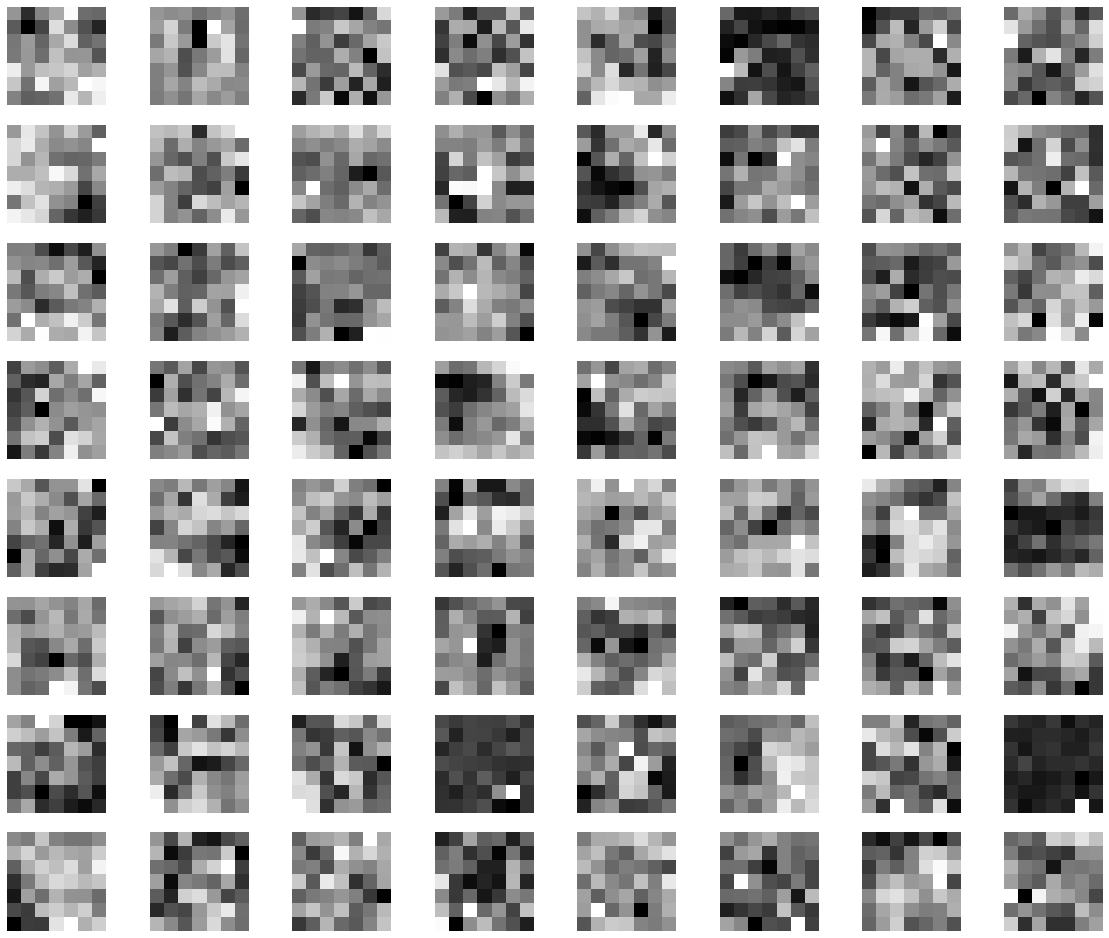

In [35]:
# 첫번째 conv layer의 kernel(7x7이 총 64개)를 시각화함
plt.figure(figsize=(20, 17))
for i, filter in enumerate(model_weights[0]):
    plt.subplot(8, 8, i+1) 
    plt.imshow(filter[0, :, :].detach(), cmap='gray')
    plt.axis('off')
    plt.savefig('../filter_outputs_style1_airplane_original_texture/filter.png')
plt.show()

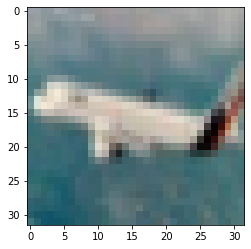

torch.Size([3, 225, 225])
torch.Size([1, 3, 225, 225])


In [36]:
# read and visualize an image
img = cv.imread(f"../../dataset/ours_style1_set/test/airplane/airplane_0999.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

# define input iamge
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((225, 225)), #(32, 32)
    transforms.ToTensor(),
])
img = np.array(img)
img = transform(img)
print(img.size())

img = img.unsqueeze(0)
print(img.size())

In [37]:
# 이미지를 전체 conv layer에 통과
results = [conv_layers[0](img)]

for i in range(1, len(conv_layers)):
    results.append(conv_layers[i](results[-1]))
    
outputs = results # for archive

In [38]:
# 레이어별로 64개 feature 저장
for num_layer in range(len(outputs)):
    plt.figure(figsize=(30, 30))
    layer_viz = outputs[num_layer][0, :, :, :]
    layer_viz = layer_viz.data
    print(layer_viz.size())
    for i, filter in enumerate(layer_viz):
        if i == 64: # we will visualize only 8x8 blocks from each layer
            break
        plt.subplot(8, 8, i + 1)
        plt.imshow(filter, cmap='gray')
        plt.axis("off")
    print(f"Saving layer {num_layer} feature maps...")
    plt.savefig(f"../filter_outputs_style1_airplane_original_texture/layer_{num_layer}.png")
    # plt.show()
    plt.close()

torch.Size([64, 113, 113])
Saving layer 0 feature maps...
torch.Size([64, 113, 113])
Saving layer 1 feature maps...
torch.Size([64, 113, 113])
Saving layer 2 feature maps...
torch.Size([256, 113, 113])
Saving layer 3 feature maps...
torch.Size([64, 113, 113])
Saving layer 4 feature maps...
torch.Size([64, 113, 113])
Saving layer 5 feature maps...
torch.Size([256, 113, 113])
Saving layer 6 feature maps...
torch.Size([64, 113, 113])
Saving layer 7 feature maps...
torch.Size([64, 113, 113])
Saving layer 8 feature maps...
torch.Size([256, 113, 113])
Saving layer 9 feature maps...
torch.Size([128, 113, 113])
Saving layer 10 feature maps...
torch.Size([128, 57, 57])
Saving layer 11 feature maps...
torch.Size([512, 57, 57])
Saving layer 12 feature maps...
torch.Size([128, 57, 57])
Saving layer 13 feature maps...
torch.Size([128, 57, 57])
Saving layer 14 feature maps...
torch.Size([512, 57, 57])
Saving layer 15 feature maps...
torch.Size([128, 57, 57])
Saving layer 16 feature maps...
torch.Siz